# simple DNN for the MNIST data set

This code will train a 3-layer DNN on the MNIST data, and output a prediction for `input.bmp`. The image is in grayscale (white on black) and must have a size of 28x28.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

## load training data

In [10]:
labels = idx2numpy.convert_from_file('train-labels.idx')
images = idx2numpy.convert_from_file('train-images.idx')

images_flat =images.reshape((-1, 28*28))

## load test data

In [11]:
test_labels = idx2numpy.convert_from_file('t10k-labels.idx')
test_images = idx2numpy.convert_from_file('t10k-images.idx')

test_images = test_images.reshape((-1, 28*28))  # flatten images for input layer

## construct model

In [12]:
model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## training

In [13]:
model.fit(
    images_flat,
    keras.utils.to_categorical(labels),
    validation_data=(test_images[:1000], keras.utils.to_categorical(test_labels[:1000])),
    batch_size=32,
    epochs=20
)

Train on 60000 samples, validate on 1000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 2.1047 - acc: 0.3039 - val_loss: 1.4811 - val_acc: 0.4590
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 1.5735 - acc: 0.4033 - val_loss: 1.3687 - val_acc: 0.4820
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 1.5198 - acc: 0.4244 - val_loss: 1.2832 - val_acc: 0.5070
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 1.4711 - acc: 0.4431 - val_loss: 1.2854 - val_acc: 0.5410
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 1.4299 - acc: 0.4623 - val_loss: 1.2767 - val_acc: 0.5690
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 1.4064 - acc: 0.4725 - val_loss: 1.2088 - val_acc: 0.5600
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 1.3713 - acc: 0.4845 - val_loss: 1.1898 - val_acc:

KeyboardInterrupt: 

In [6]:
_, acc = model.evaluate(test_images[1000:], keras.utils.to_categorical(test_labels[1000:]))
print(f'Accuracy on rest of test data: {acc:.2f}')

9000/9000 [==============================] - 0s 33us/step
Accuracy on rest of test data: 0.87


<BarContainer object of 10 artists>

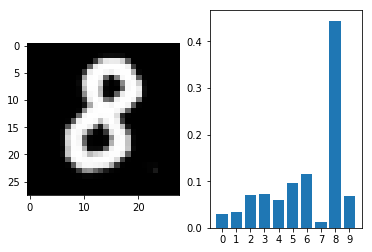

In [8]:
from PIL import Image

# load input image into array
input_image = Image.open('input.bmp')
array = np.array(input_image.getdata())[:,0]

x = np.arange(10) # digits
y = model.predict(array.reshape((1, 784))).reshape(10) # categorical output

# Draw input image
plt.subplot(121)
plt.imshow(array.reshape((28, 28)), cmap='Greys_r')

# Show output
plt.subplot(122)
plt.xticks(x)
plt.bar(x, y)